In [1]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import nltk
print(nltk.data.path)
nltk.data.path.append('/usr/local/share/nltk_data')
nltk.download('punkt')


['C:\\Users\\nalla/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\nalla\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       tagge

True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nalla\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Classification Report:
                    precision    recall  f1-score   support

       Competition       0.50      0.78      0.61         9
         Objection       0.45      0.45      0.45        11
Pricing Discussion       0.38      0.33      0.35         9
          Security       0.30      0.50      0.38         6

         micro avg       0.42      0.51      0.46        35
         macro avg       0.41      0.52      0.45        35
      weighted avg       0.42      0.51      0.45        35
       samples avg       0.39      0.57      0.44        35



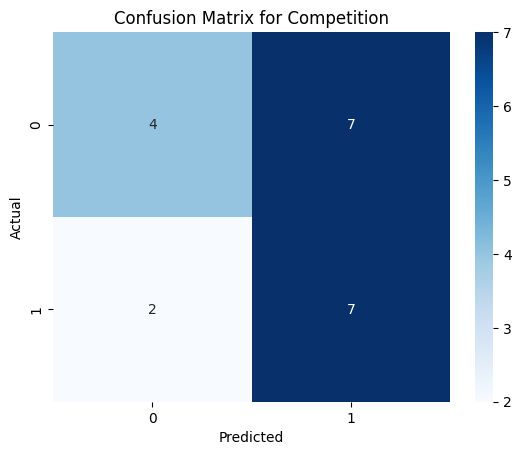

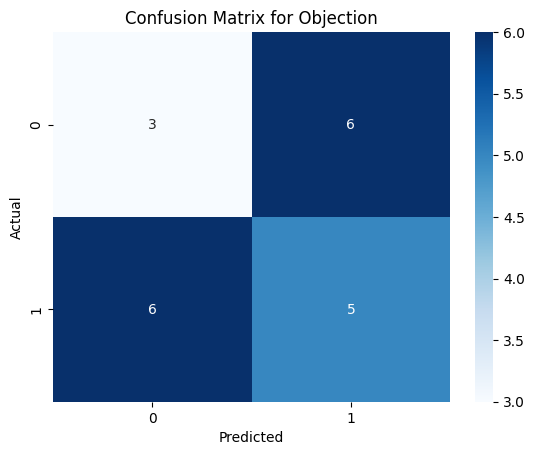

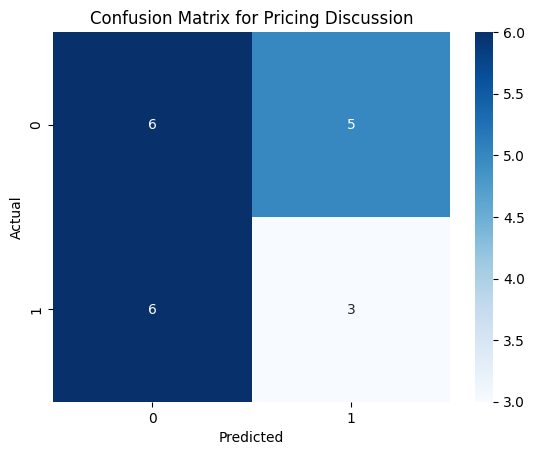

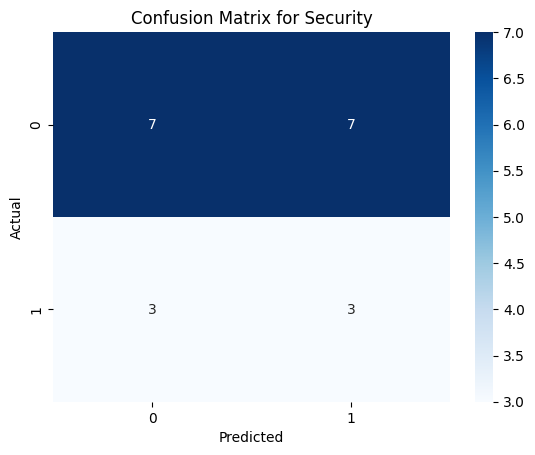

In [4]:
import pandas as pd
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

# Ensure required NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the dataset with proper encoding
calls_dataset = pd.read_csv("C:\\Users\\nalla\\OneDrive\\GTM Buddy\\calls_dataset.csv", encoding='utf-8')

# Data Cleaning & Preprocessing
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = nltk.WordNetLemmatizer()
    
    # Remove special characters and normalize Unicode
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
    
    # Tokenize text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return " ".join(cleaned_tokens)

# Apply cleaning function to text data
calls_dataset['cleaned_text'] = calls_dataset['text_snippet'].apply(lambda x: clean_text(str(x)))

# Encode Labels for Multi-Label Classification
calls_dataset['labels_list'] = calls_dataset['labels'].apply(lambda x: [label.strip() for label in x.split(",")])

mlb = MultiLabelBinarizer()
labels_encoded = mlb.fit_transform(calls_dataset['labels_list'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    calls_dataset['cleaned_text'], labels_encoded, test_size=0.2, random_state=42
)

# Text Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model Training
classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))
classifier.fit(X_train_tfidf, y_train)

# Evaluate the Model
y_pred = classifier.predict(X_test_tfidf)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

# Confusion Matrix and Visualization
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

# Plot Confusion Matrices
for i, matrix in enumerate(conf_matrix):
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {mlb.classes_[i]}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 1: Check the number of instances per label in training data
print("Label Distribution in Training Data:")
print(np.sum(y_train, axis=0))  # Sum per label (how many 1's for each label)

# Step 2: Inspect the first few rows of the feature matrix (X_train_tfidf)
print("\nSample of X_train_tfidf:")
print(X_train_tfidf[:5])  # Display the first 5 rows

# Step 3: Inspect the first few rows of the target labels (y_train)
print("\nSample of y_train:")
print(y_train[:5])  # Display the first 5 target rows

# Step 4: Check the class weight calculation for RandomForest (after fitting)
print("\nClass weights specified for RandomForest:")
print(classifier.get_params())  # This will show the parameters, including 'class_weight'

# Step 5: Try a simpler model like Logistic Regression wrapped in MultiOutputClassifier
print("\nTraining with Logistic Regression...")
classifier_lr = MultiOutputClassifier(LogisticRegression(random_state=42))

# Fit the model
classifier_lr.fit(X_train_tfidf, y_train)

# Step 6: Evaluate on the same data and get a prediction
y_pred_lr = classifier_lr.predict(X_train_tfidf)
print("\nSample Predictions with Logistic Regression:")
print(y_pred_lr[:10])  # Display first 10 predictions

# Step 7: Get predictions for a single sample (first row of X_train_tfidf)
y_pred_sample_lr = classifier_lr.predict(X_train_tfidf[:1])  # Use [:1] to get the first sample as a 2D array
print("\nPredictions for first sample with Logistic Regression:", y_pred_sample_lr)


Label Distribution in Training Data:
[45 43 35 42]

Sample of X_train_tfidf:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 26 stored elements and shape (5, 47)>
  Coords	Values
  (0, 44)	0.3094396882542001
  (0, 29)	0.4042659490059787
  (0, 3)	0.42402172336972155
  (0, 14)	0.44660878783218283
  (0, 34)	0.31996626752912133
  (0, 7)	0.4042659490059787
  (0, 36)	0.3094396882542001
  (1, 36)	0.2721174180964902
  (1, 37)	0.5000630669278351
  (1, 38)	0.5000630669278351
  (1, 4)	0.6525534223019251
  (2, 32)	0.4796608907606455
  (2, 8)	0.5565755021774785
  (2, 30)	0.4796608907606455
  (2, 20)	0.4796608907606455
  (3, 22)	0.5011079443226892
  (3, 11)	0.34954701554921097
  (3, 5)	0.34954701554921097
  (3, 1)	0.3606649163830931
  (3, 23)	0.3606649163830931
  (3, 42)	0.34954701554921097
  (3, 0)	0.34954701554921097
  (4, 32)	0.4796608907606455
  (4, 8)	0.5565755021774785
  (4, 30)	0.4796608907606455
  (4, 20)	0.4796608907606455

Sample of y_train:
[[1 0 1 0]
 [1 0 1 1]
 [0 0 1 0]
 

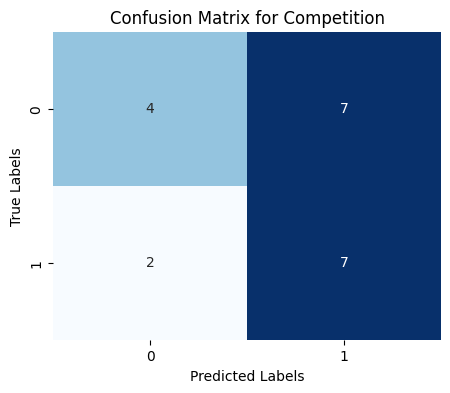

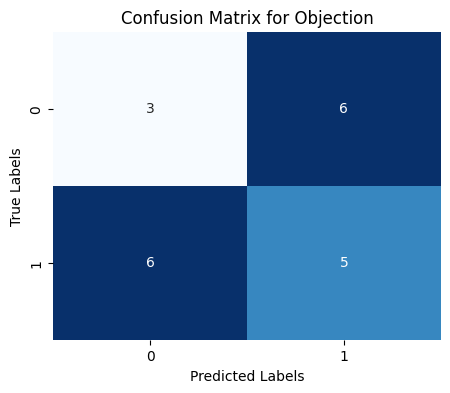

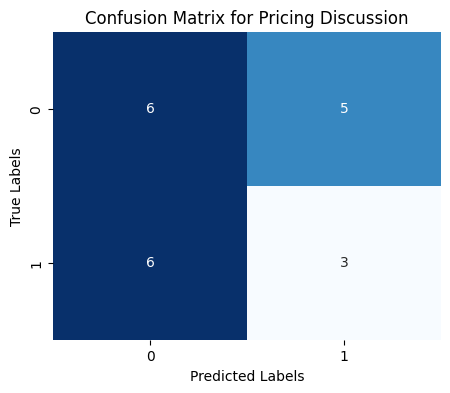

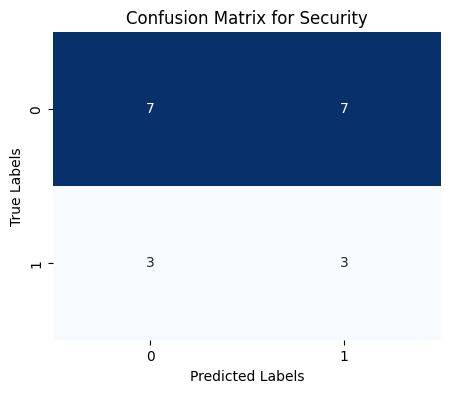

Cross-validation scores: [0.1875 0.125  0.     0.125  0.    ]
Average cross-validation score: 0.0875


In [8]:
for i, label in enumerate(mlb.classes_):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {label}')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()
from sklearn.model_selection import cross_val_score

# Example: Using cross_val_score with a classifier (e.g., RandomForestClassifier)
scores = cross_val_score(classifier_lr, X_train_tfidf, y_train, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

In [10]:
import os
import pickle

# Ensure the directory exists
output_dir = "/gtmbuddy/data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)  # Create the directory if it doesn't exist

# Save Processed Data and Model for Reuse
calls_dataset.to_csv(os.path.join(output_dir, "cleaned_calls_dataset.csv"), index=False)
with open(os.path.join(output_dir, "vectorizer.pkl"), "wb") as f:
    pickle.dump(vectorizer, f)
with open(os.path.join(output_dir, "classifier.pkl"), "wb") as f:
    pickle.dump(classifier, f)

print("Files saved successfully in:", output_dir)

Files saved successfully in: /gtmbuddy/data


In [11]:
def predict_labels(input_text, vectorizer, classifier, mlb):
    # Preprocess the input text
    cleaned_text = clean_text(input_text)
    
    # Vectorize the cleaned text
    text_tfidf = vectorizer.transform([cleaned_text])
    
    # Predict labels
    predicted = classifier.predict(text_tfidf)
    
    # Decode the binary prediction into label names
    predicted_labels = mlb.inverse_transform(predicted)
    
    return predicted_labels[0] if predicted_labels else []

# Example Usage
input_text = "Are you ISO 27001 certified for your cloud solutions?"
predicted_labels = predict_labels(input_text, vectorizer, classifier, mlb)
print("Predicted Labels:", predicted_labels)

Predicted Labels: ('Competition', 'Objection', 'Security')
